In [10]:
!pip install download

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
from download import download

url = "https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/datasets/cifar-10-binary.tar.gz"

download(url, "./datasets-cifar10-bin", kind="tar.gz", replace=True)


Creating data folder...

file_sizes: 100%|████████████████████████████| 170M/170M [00:18<00:00, 8.95MB/s]
Extracting tar.gz file...
Successfully downloaded / unzipped to ./datasets-cifar10-bin


'./datasets-cifar10-bin'

In [3]:
import mindspore
import mindcv

In [7]:
import os
from mindcv.data import create_dataset, create_transforms, create_loader

cifar10_dir = './datasets-cifar10-bin/cifar-10-batches-bin'  # your dataset path
num_classes = 10  # num of classes
num_workers=4

# create dataset
dataset_train = create_dataset(name='cifar10', root=cifar10_dir, split='train', shuffle=True)
# create transforms
trans = create_transforms(dataset_name='cifar10', image_resize=224)

In [8]:
# Perform data augmentation operations to generate the required dataset.
loader_train = create_loader(dataset=dataset_train,
                             batch_size=64,
                             is_training=True,
                             num_classes=num_classes,
                             transform=trans,
                             num_parallel_workers=num_workers)

num_batches = loader_train.get_dataset_size()

In [9]:
# Load validation dataset
dataset_val = create_dataset(
    name='cifar10', root=cifar10_dir, split='test', shuffle=True, num_parallel_workers=num_workers
)

# Perform data enhancement operations to generate the required dataset.
loader_val = create_loader(dataset=dataset_val,
                           batch_size=64,
                           is_training=False,
                           num_classes=10,
                           transform=trans,
                           num_parallel_workers=num_workers)

In [10]:
images, labels = next(loader_train.create_tuple_iterator())
print("Tensor of image", images.shape)
print("Labels:", labels)

Tensor of image (64, 3, 224, 224)
Labels: [0 4 9 5 3 5 2 7 0 6 1 8 0 6 2 5 8 8 0 4 4 5 2 2 9 8 5 6 5 7 6 5 4 8 0 9 0
 2 0 3 1 4 0 0 9 9 9 6 9 9 3 7 6 6 1 8 7 9 5 2 6 3 5 8]


In [11]:
from mindcv.models import create_model

network = create_model(model_name='squeezenet1_0', num_classes=1000, pretrained=True)

In [12]:
network

SqueezeNet<
  (features): SequentialCell<
    (0): Conv2d<input_channels=3, output_channels=96, kernel_size=(7, 7), stride=(2, 2), pad_mode=valid, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
    (1): ReLU<>
    (2): MaxPool2d<kernel_size=3, stride=2, pad_mode=VALID>
    (3): Fire<
      (squeeze): Conv2d<input_channels=96, output_channels=16, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
      (squeeze_activation): ReLU<>
      (expand1x1): Conv2d<input_channels=16, output_channels=64, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
      (expand1x1_activation): ReLU<>
      (expand3x3): Conv2d<input_channels=16, output_channels=64, kernel_size=(3, 3), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_

In [13]:

for param in network.get_parameters():
    print(param.name)

features.0.weight
features.0.bias
features.3.squeeze.weight
features.3.squeeze.bias
features.3.expand1x1.weight
features.3.expand1x1.bias
features.3.expand3x3.weight
features.3.expand3x3.bias
features.4.squeeze.weight
features.4.squeeze.bias
features.4.expand1x1.weight
features.4.expand1x1.bias
features.4.expand3x3.weight
features.4.expand3x3.bias
features.5.squeeze.weight
features.5.squeeze.bias
features.5.expand1x1.weight
features.5.expand1x1.bias
features.5.expand3x3.weight
features.5.expand3x3.bias
features.7.squeeze.weight
features.7.squeeze.bias
features.7.expand1x1.weight
features.7.expand1x1.bias
features.7.expand3x3.weight
features.7.expand3x3.bias
features.8.squeeze.weight
features.8.squeeze.bias
features.8.expand1x1.weight
features.8.expand1x1.bias
features.8.expand3x3.weight
features.8.expand3x3.bias
features.9.squeeze.weight
features.9.squeeze.bias
features.9.expand1x1.weight
features.9.expand1x1.bias
features.9.expand3x3.weight
features.9.expand3x3.bias
features.10.squeez

In [14]:
for param in network.get_parameters():
    if param.name == "classifier.1.weight":
        param.name = "classifier.weight"

In [15]:
for param in network.get_parameters():
    if param.name == "classifier.1.bias":
        param.name = "classifier.bias"

In [16]:
for param in network.get_parameters():
    if param.name in ["classifier.weight", "classifier.bias"]:
        print(param.name)

classifier.weight
classifier.bias


In [17]:
# Number of input features to the final layer (remains the same)
from  mindspore import nn
num_features = network.classifier[1].in_channels

# Replace the final Conv2d layer
network.classifier[1] = nn.Conv2d(num_features, 10, kernel_size=1, has_bias=True)

In [18]:
network

SqueezeNet<
  (features): SequentialCell<
    (0): Conv2d<input_channels=3, output_channels=96, kernel_size=(7, 7), stride=(2, 2), pad_mode=valid, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
    (1): ReLU<>
    (2): MaxPool2d<kernel_size=3, stride=2, pad_mode=VALID>
    (3): Fire<
      (squeeze): Conv2d<input_channels=96, output_channels=16, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
      (squeeze_activation): ReLU<>
      (expand1x1): Conv2d<input_channels=16, output_channels=64, kernel_size=(1, 1), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_bias=True, weight_init=normal, bias_init=zeros, format=NCHW>
      (expand1x1_activation): ReLU<>
      (expand3x3): Conv2d<input_channels=16, output_channels=64, kernel_size=(3, 3), stride=(1, 1), pad_mode=same, padding=0, dilation=(1, 1), group=1, has_

In [19]:

for param in network.get_parameters():
    print(param.name)

features.0.weight
features.0.bias
features.3.squeeze.weight
features.3.squeeze.bias
features.3.expand1x1.weight
features.3.expand1x1.bias
features.3.expand3x3.weight
features.3.expand3x3.bias
features.4.squeeze.weight
features.4.squeeze.bias
features.4.expand1x1.weight
features.4.expand1x1.bias
features.4.expand3x3.weight
features.4.expand3x3.bias
features.5.squeeze.weight
features.5.squeeze.bias
features.5.expand1x1.weight
features.5.expand1x1.bias
features.5.expand3x3.weight
features.5.expand3x3.bias
features.7.squeeze.weight
features.7.squeeze.bias
features.7.expand1x1.weight
features.7.expand1x1.bias
features.7.expand3x3.weight
features.7.expand3x3.bias
features.8.squeeze.weight
features.8.squeeze.bias
features.8.expand1x1.weight
features.8.expand1x1.bias
features.8.expand3x3.weight
features.8.expand3x3.bias
features.9.squeeze.weight
features.9.squeeze.bias
features.9.expand1x1.weight
features.9.expand1x1.bias
features.9.expand3x3.weight
features.9.expand3x3.bias
features.10.squeez

In [20]:
from mindcv.loss import create_loss

loss = create_loss(name='CE')

In [22]:
from mindcv.scheduler import create_scheduler

# learning rate scheduler
lr_scheduler = create_scheduler(steps_per_epoch=num_batches,
                                warmup_epochs=5,
                                lr=0.0001)

In [23]:
from mindcv.optim import create_optimizer

# create optimizer
opt = create_optimizer(network.trainable_params(), opt='adam', lr=lr_scheduler)

In [24]:
from mindspore import Model

# Encapsulates examples that can be trained or inferred
model = Model(network, loss_fn=loss, optimizer=opt, metrics={'accuracy'})

In [25]:
from mindspore import LossMonitor, TimeMonitor, CheckpointConfig, ModelCheckpoint

# Set the callback function for saving network parameters during training.
ckpt_save_dir = './ckpt'
ckpt_config = CheckpointConfig(save_checkpoint_steps=num_batches)
ckpt_cb = ModelCheckpoint(prefix='squeezenet-cifar10',
                          directory=ckpt_save_dir,
                          config=ckpt_config)

model.train(50, loader_train, callbacks=[LossMonitor(num_batches//50), TimeMonitor(num_batches//50), ckpt_cb], dataset_sink_mode=False)

epoch: 1 step: 15, loss is 2.397960662841797
epoch: 1 step: 30, loss is 2.385584831237793
epoch: 1 step: 45, loss is 2.336897373199463
epoch: 1 step: 60, loss is 2.4022867679595947
epoch: 1 step: 75, loss is 2.3241772651672363
epoch: 1 step: 90, loss is 2.3397464752197266
epoch: 1 step: 105, loss is 2.3268818855285645
epoch: 1 step: 120, loss is 2.314523220062256
epoch: 1 step: 135, loss is 2.3777570724487305
epoch: 1 step: 150, loss is 2.2479944229125977
epoch: 1 step: 165, loss is 2.2254137992858887
epoch: 1 step: 180, loss is 2.238211154937744
epoch: 1 step: 195, loss is 2.2340850830078125
epoch: 1 step: 210, loss is 2.130514144897461
epoch: 1 step: 225, loss is 2.1084799766540527
epoch: 1 step: 240, loss is 2.1589860916137695
epoch: 1 step: 255, loss is 2.068284034729004
epoch: 1 step: 270, loss is 2.017672061920166
epoch: 1 step: 285, loss is 1.889249563217163
epoch: 1 step: 300, loss is 1.7951602935791016
epoch: 1 step: 315, loss is 1.7130870819091797
epoch: 1 step: 330, loss is 

In [27]:

acc = model.eval(loader_val, dataset_sink_mode=False)
print(acc)

{'accuracy': 0.9053}


In [38]:
import matplotlib.pyplot as plt
import mindspore as ms
import numpy as np
import math
def visualize_model(model, val_dl, num_classes=10):
    # Load the data of the validation set for validation
    images, labels = next(val_dl.create_tuple_iterator())
    
    # Ensure only 15 images are used
    images = images[:15]
    labels = labels[:15]

    # Predict image class
    output = model.predict(images)
    pred = np.argmax(output.asnumpy(), axis=1)

    # Convert to numpy for visualization
    images = images.asnumpy()
    labels = labels.asnumpy()

    # Define class names
    class_name = {
        0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
        5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"
    }

    # Set up the figure
    plt.figure(figsize=(15, 7))
    for i in range(15):
        plt.subplot(3, 5, i + 1)
        color = 'blue' if pred[i] == labels[i] else 'red'
        plt.title('Predict: {}'.format(class_name[pred[i]]), color=color)

        # Image processing for display
        picture_show = np.transpose(images[i], (1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        picture_show = std * picture_show + mean
        picture_show = np.clip(picture_show, 0, 1)

        plt.imshow(picture_show)
        plt.axis('off')

    plt.show()


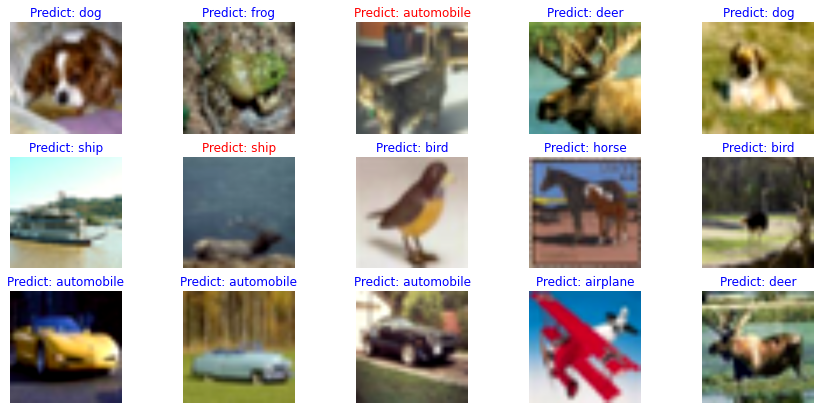

In [40]:
visualize_model(model, loader_val)